<a href="https://colab.research.google.com/github/Kyeeeeji/DALC_Scalar/blob/main/DALC_Scala_w6_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head(4)    
# 일반적으로 행을 표본이라고 하고 열을 특징이라고 함. --> 특징행렬
# 열의 마지막에는 꽃의 품종 나타내는 값 : (케바케) 이 열을 따로 구분하여 **대상(타겟)**이라고 부른다
# 대상 배열의 두드러진 특징 =  데이터로부터 예측하고자 하는 값 = 종속변수

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [4]:
import matplotlib.pyplot as plt
import numpy as np

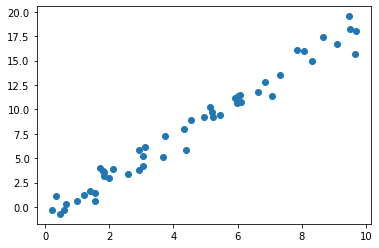

In [5]:
rng = np.random.RandomState(42)
# numpy로 생성한 난수 데이터

x = 10*rng.rand(50)
# 0과 1사이의 난수 50개 생성하고 10을 곱하여 결과적으로 0~10 사이의 값을 갖도록 함

y = 2*x-1+rng.randn(50)   # y는 x에 2를 곱하고 1을 뺀 다음에 표준정규분포를 따르는 난수를 더해서 변동이 발생하도록
plt.scatter(x,y);

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression(fit_intercept=True)    # 절편 사용할땐 True, 안사용할땐 False

In [8]:
# 1차원으로 생성된 데이터 2차원으로 변경하기
X = x.reshape(50,1)
X.shape

# X = x[:, np.newaxis]
# X.shape 도 가능

(50, 1)

In [9]:
model.fit(X, y)    # 사용자가 해당 속성값을 간단히 확인 가능

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Scikit-Learn에서는 관례상 fit() 절차동안 학습된 모델모수는 뒤에 모두 _가 붙는다
print(model.coef_)    # 기울기 계수값
print(model.intercept_)   # 절편값 1개의 모수

[1.9776566]
-0.9033107255311146


In [11]:
# Scikit-Learn에서는 관례상 fit() 절차동안 학습된 모델모수는 뒤에 모두 _가 붙는다
print(model.coef_)    # 기울기 계수값
print(model.intercept_)   # 절편값 1개의 모수# Scikit-Learn에서는 관례상 fit() 절차동안 학습된 모델모수는 뒤에 모두 _가 붙는다
print(model.coef_)    # 기울기 계수값
print(model.intercept_)   # 절편값 1개의 모수

[1.9776566]
-0.9033107255311146
[1.9776566]
-0.9033107255311146


In [12]:
# 모델 정확도 확인
model.score(X, y)
# 0.97정도의 R^2(결정계수)값 산술
# 1에 가까운 값을 나타낼 수록 정확도가 높다고 판단

0.9749140085676858

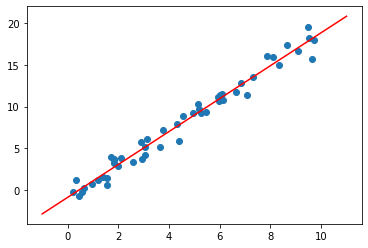

In [13]:
# 모델 추가
xfit = np.linspace(-1,11)
plt.scatter(x,y)
plt.plot(xfit, model.coef_*xfit+model.intercept_,'-r');

In [16]:
# 파이프라인 : 전처리 프로그램과 선형회귀 모델을 묶어놓은 프로그램
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [17]:
# 데이터 생성
# 40개의 데이터를 생성하고 x와 y의 관계는 비선형
import numpy as np

def make_data(N, err=1.0, rseed=1):
  rng=np.random.RandomState(rseed)
  X=rng.rand(N)**2
  y=10-1./(X+0.1)
  if err >0:
    y += err*rng.randn(N)
    return X,y
  
X,y = make_data(40)

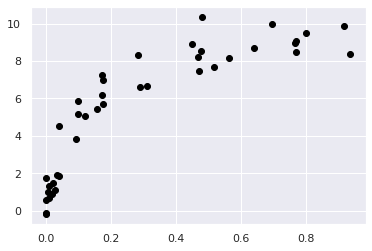

In [18]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set()

X_test=np.linspace(-0.1,1.1,500)
plt.scatter(X,y,color='black')
axis=plt.axis()

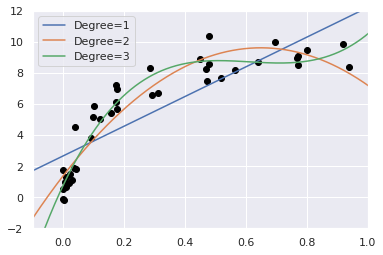

In [19]:
plt.scatter(X,y,color='black')

for degree in [1,2,3]:    # 반복문 내부에서 다항식의 차수를 1에서 3까지 증가시킴
  model=PolynomialRegression(degree)
  model.fit(X[:,np.newaxis],y)
  y_test=model.predict(X_test[:,np.newaxis])
  plt.plot(X_test,y_test,label=f'Degree={degree}')

  plt.axis([-0.1,1.0,-2,12])
  plt.legend(loc='best')